In [29]:
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.pyplot import figure 
from scipy.stats import linregress

In [2]:
global_temps = pd.read_csv("data_sets/GlobalTemperatures_kaggle.csv")
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [3]:
np.dtype(global_temps["dt"])

dtype('O')

In [4]:
global_temps.dropna(how = "any", inplace = True)
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [5]:
# retrieving first value in list of values separated by hyphen
splited_series = global_temps['dt'].str.split('-').str[0]
splited_series

#replacing hyphen so we can filter for years
#global_temps_dt = [x.replace("-","") for x in global_temps["dt"]]

1200    1850
1201    1850
1202    1850
1203    1850
1204    1850
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: dt, Length: 1992, dtype: object

In [6]:
#adding as new series
global_temps["year"] = splited_series.astype("int64")


In [7]:
#checking if new column is added
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


In [8]:
#checking data type
 print(np.dtype(global_temps["year"]))

int64


In [9]:
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


In [10]:
#getting data from last 50 years; 1966 to 2015 
average_temperatures = global_temps.groupby("year")["LandAverageTemperature"].sum()/12
average_temperatures

year
1850    7.900667
1851    8.178583
1852    8.100167
1853    8.041833
1854    8.210500
          ...   
2011    9.516000
2012    9.507333
2013    9.606500
2014    9.570667
2015    9.831000
Name: LandAverageTemperature, Length: 166, dtype: float64

In [11]:
ave_temps_year = pd.DataFrame(average_temperatures)

ave_temps_year.rename(columns = {"LandAverageTemperature":"Global Average Temperature"}, inplace = True)

In [12]:
ave_temps_year

,Global Average Temperature
year,
1850,7.900667
1851,8.178583
1852,8.100167
1853,8.041833
1854,8.210500
...,...
2011,9.516000
2012,9.507333
2013,9.606500


In [13]:
mean_co2_emission = pd.read_excel("../project_1_data/global_mean_CO2_emissions_year.xlsx")
mean_co2_emission

,year,yearly mean co2 emission (ppm)
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99
...,...,...
57,2016,404.22
58,2017,406.55
59,2018,408.52
60,2019,411.43


In [14]:
merged_df = pd.merge(ave_temps_year, mean_co2_emission, on = "year", how = "outer")
merged_df

,year,Global Average Temperature,yearly mean co2 emission (ppm)
0,1850,7.900667,NaN
1,1851,8.178583,NaN
2,1852,8.100167,NaN
3,1853,8.041833,NaN
4,1854,8.210500,NaN
...,...,...,...
166,2016,NaN,404.22
167,2017,NaN,406.55
168,2018,NaN,408.52
169,2019,NaN,411.43


In [15]:
merged_df.dropna(how = "any", inplace = True)
merged_df

,year,Global Average Temperature,yearly mean co2 emission (ppm)
109,1959,8.732667,315.98
110,1960,8.583750,316.91
111,1961,8.797667,317.64
112,1962,8.745917,318.45
113,1963,8.856000,318.99
114,1964,8.409667,319.62
115,1965,8.527417,320.04
116,1966,8.599333,321.37
117,1967,8.700083,322.18
118,1968,8.516333,323.05


# Scatter plot and Line of regression

y = 0.01x + 3.97


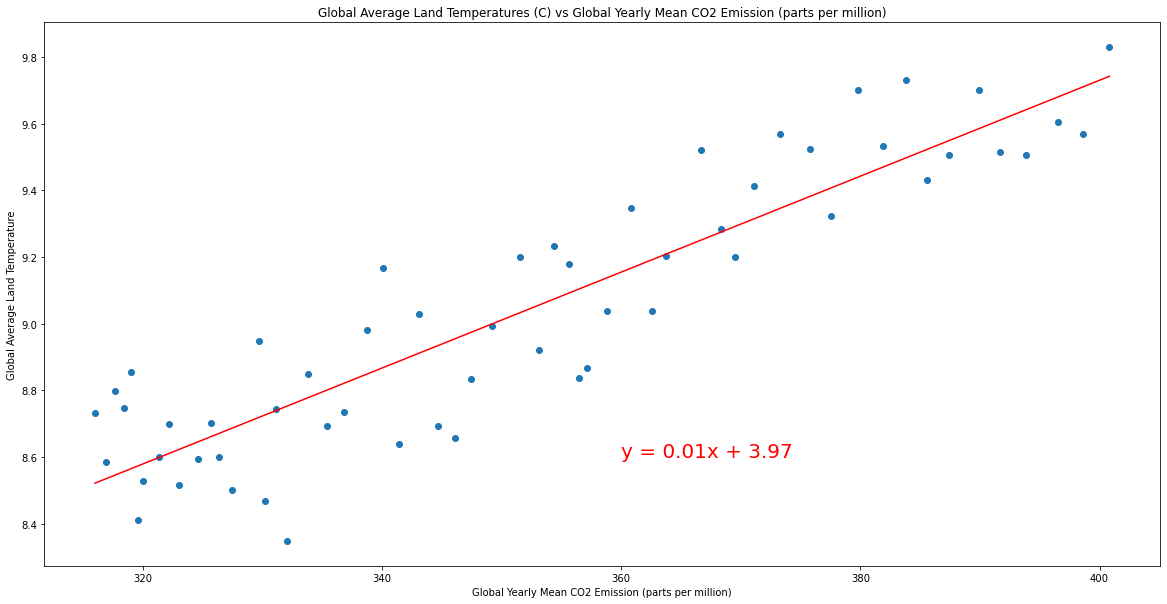

In [48]:
#creating x and y values
x_values = merged_df["yearly mean co2 emission (ppm)"]
y_values = merged_df["Global Average Temperature"]


#scatter plot configuration
plt.figure(figsize=(20, 10))
plt.scatter(x_values, y_values)
plt.xlabel("Global Yearly Mean CO2 Emission (parts per million)")
plt.ylabel("Global Average Land Temperature")
plt.title("Global Average Land Temperatures (C) vs Global Yearly Mean CO2 Emission (parts per million)")

#plotting line of regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
y_values_line = slope*x_values + intercept

line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(360,8.6),fontsize=20,color="red")
print(f"y = {round(slope,2)}x + {round(intercept,2)}")

plt.plot(x_values, y_values_line, color = "red")

plt.show()